# Lab 11: Feed-forward NN and RNN

In [5]:
# 1. uncomment this cell
# 2. run this cell
# 3. restart the kernel and comment this cell again

# !pip install portalocker

  Using cached portalocker-2.7.0-py2.py3-none-any.whl (15 kB)



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
from torchtext.datasets import WikiText2
train_data, val_data, test_data = WikiText2()
DATASET_SIZE = 36718 # check the documentation here: https://pytorch.org/text/stable/datasets.html#language-modeling

In [7]:
# to better understand the object returned
for i, x in enumerate(train_data):
    print(x)
    print("#" * 1000)
    if i >= 5:
        break

 

#####################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [9]:
from building_vocabulary import build_vocabulary
vocab = build_vocabulary(train_data)
for i, item in enumerate(vocab.get_itos()):
    print(item)
    if i >= 5:
        break

c:\Users\bouab\DEV\ds_env_new\lib\site-packages\torch\utils\data\datapipes\iter\combining.py:297: UserWarning: Some child DataPipes are not exhausted when __iter__ is called. We are resetting the buffer and each child DataPipe will read from the start again.
  warnings.warn("Some child DataPipes are not exhausted when __iter__ is called. We are resetting "


<unk>
the
,
.
of
unk


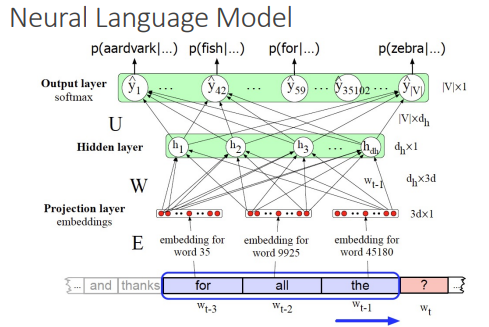

In [10]:
# %reload_ext autoreload
# %autoreload 2

import FFNLM
from FFNLM import NeuralLM, train_NLM
import importlib
importlib.reload(FFNLM)

# language_model = NeuralLM(len(vocab))

# train_NLM(language_model, vocab=vocab, train_data=train_data, train_data_size=DATASET_SIZE, epochs=20, batch_size=8)

from FFNLM import DEVICE
print(DEVICE)
import torch
print(torch.__version__)

cuda
2.0.1+cu117


##2. Sentiment Analysis using RNN

### Dataset Description

[IMDb dataset](http://ai.stanford.edu/~amaas/data/sentiment/) having 50K movie reviews for natural language processing or Text analytics. This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. 

### Data Preprocessing

[`torchtext`](https://pytorch.org/text/stable/index.html) is a package that consists of data processing utilities and popular datasets for natural language

One of the main concepts of TorchText is the `Field`. To define how the data should be processed we will use `Field`. Our input data contains raw strings <br>
The declared `TEXT` field defines how the review should be processed, and the `LABEL` field to process the sentiment. 

For more on `Fields`, go [here](https://github.com/pytorch/text/blob/master/torchtext/data/field.py).


### Download the data
The following code automatically downloads the IMDb dataset and splits it into the canonical train/test splits as `torchtext.datasets` objects. It process the data using the `Fields` we have previously defined. The IMDb dataset consists of 50,000 movie reviews, each marked as being a positive or negative review.

In [1]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 6.6 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset


train_iter = load_dataset("imdb", split="train")
test_iter = load_dataset("imdb", split="test")
DATASET_SIZE = 24999

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/d613c88cf8fa3bab83b4ded3713f1f74830d1100e171db75bbddb80b3345c9c0. Subsequent calls will reuse this data.


In [3]:
labels = set()
for i, x in enumerate(train_iter):
    if x["label"] not in labels:
        print(x)
        labels.add(x["label"])
i

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

24999

### Split data to train and test

In [4]:
import re

from torchtext.data import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator


tokenizer = get_tokenizer("basic_english")


def preprocess_sentence(s):
    s = s.strip()
    s = s.lower()
    s = re.sub(r"[^a-zA-Z.,!?]+", " ", s)
    s = re.sub(r"\s{2,}", " ", s)
    s = s.strip()
    return s


def build_vocab(dataset):
    for x in dataset:
        yield tokenizer(preprocess_sentence(x["text"]))

vocab = build_vocab_from_iterator(build_vocab(train_iter), max_tokens=25000, specials=["<UNK>", "<PAD>"])
vocab.set_default_index(vocab["<UNK>"])

VOCAB_SIZE = len(vocab)
VOCAB_SIZE

25000

### Dataloders / Iterators 

* We have done preprocessing of the raw data but we have to create batches and convert the data to tensors. For text data Pytorch provides a container called `BucketIterator` for such task.

* The `BucketIterator` will return a batch of examples where each example is of a similar length, minimizing the amount of padding per example.

* To put the data into the training device, its neccesary to specify the device parameter in the `BucketIterator` then Pytorch will take care of the rest. 


In [5]:
import torch

from torch.utils.data import DataLoader

batch_size = 64
SEQUENCE_LENGTH = 100


def text_pipeline(x): 
    return vocab(tokenizer(preprocess_sentence(x)))


def collate_fn(batch):
    batch_input, batch_output = [], []
    for x in batch:
        text_tokens_ids = text_pipeline(x["text"])
        if len(text_tokens_ids) > SEQUENCE_LENGTH:
            text_tokens_ids = text_tokens_ids[:SEQUENCE_LENGTH]
        elif len(text_tokens_ids) < SEQUENCE_LENGTH:
            text_tokens_ids.extend(vocab(["<PAD>" for _ in range(SEQUENCE_LENGTH - len(text_tokens_ids))]))

        batch_input.append(text_tokens_ids)
        batch_output.append(x["label"])
    batch_input = torch.tensor(batch_input, dtype=torch.int)
    batch_output = torch.tensor(batch_output, dtype=torch.float)
    return batch_input, batch_output


dataloader = DataLoader(train_iter, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
test_dataloader = DataLoader(test_iter, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

### Build the Model

The next stage is building the model that we'll eventually train and evaluate. 

There is a small amount of boilerplate code when creating models in PyTorch, note how our `RNN` class is a sub-class of `nn.Module` and the use of `super`.

Within the `__init__` we define the _layers_ of the module. Our three layers are an _embedding_ layer, our RNN, and a _linear_ layer. All layers have their parameters initialized to random values, unless explicitly specified.



![](https://github.com/bentrevett/pytorch-sentiment-analysis/blob/master/assets/sentiment7.png?raw=1)



In [6]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, n_layers=1):
        super().__init__()
        
        self.embedding_layer = nn.Embedding(input_dim, embedding_dim)
        self.rnn_cell = nn.RNN(embedding_dim, hidden_dim, n_layers)
        self.fc_layer = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, text):
        """
        Foward pass method
        text: sentiment text with shape [batch size, sentence length]
        """
        embedded = self.embedding_layer(text.permute(1, 0))  # embedding_layer output shape  (batch size, sentence length, embedding dim]
        output, hidden = self.rnn_cell(embedded)
        return self.fc_layer(hidden.squeeze(0)).squeeze(1)

In [7]:
input_dim = VOCAB_SIZE  # input dimension is the dimension of the one-hot vectors
embedding_dim = 128
hidden_dim = 256  # size of the hidden states
output_dim = 1  # for the fully connected 

model = RNN(input_dim, embedding_dim, hidden_dim, output_dim)

### Model Training

Before the training process we need to specify which optimization algorithm to use, set the optimization method parameters and specify the parameters to train

In [8]:
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# define loss function and optimizer
optimizer = optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()

#make model instance and send it to training device
model = model.to(device)
criterion = criterion.to(device)

### Model perfomence measurement 

In [9]:
# accuracy_calculator which takes predicted labels and real labels
def accuracy_calculator(preds, y):
    """Returns accuracy per batch"""
    rounded_preds = torch.round(torch.sigmoid(preds)) #round predictions to the closest integer
    correct = (rounded_preds == y).float()
    return correct.sum() / len(correct)

### Model training loop definition

In [13]:
def train(model, dataloader, optimizer, criterion, device):
    epoch_loss = 0
    epoch_acc = 0

    model.train()
    
    for text, label in dataloader:
        text = text.to(device)
        label = label.to(device)

        # initialize optimizer
        ...
        # predict labels and compute loss (2 lines)
        predictions = ...
        loss = ...

        acc = accuracy_calculator(predictions, label)
        
        # backpropagate loss and optimize weights (2 lines)
        ...
        ...
        
        epoch_loss += loss.item() * label.shape[0]
        epoch_acc += acc.item() * label.shape[0]
        
    return epoch_loss / DATASET_SIZE, epoch_acc / DATASET_SIZE

### Evaluating the model on test set

In [14]:
def evaluate_model(model, data_batches, criterion, device):
    eval_loss = 0
    eval_acc = 0
    
    model.eval()
    
    with torch.no_grad():
        for text, label in data_batches:
            text = text.to(device)
            label = label.to(device)

            # predict labels and compute loss (2 lines)
            predictions = ...
            loss = ...

            acc = accuracy_calculator(predictions, label)
            eval_loss += loss.item() * label.shape[0]
            eval_acc += acc.item() * label.shape[0]
    
    return eval_loss / DATASET_SIZE, eval_acc / DATASET_SIZE

### Training the RNN model

In [15]:
epochs = 10

for epoch in range(epochs):
    train_loss, train_acc = train(model, dataloader, optimizer, criterion, device)
    print(f'Epoch: {epoch+1}, Train [Loss:  {train_loss:.3f}  Acc: {train_acc*100:.2f}]')

Epoch: 1, Train [Loss:  0.699  Acc :50.94]
Epoch: 2, Train [Loss:  0.691  Acc :53.08]
Epoch: 3, Train [Loss:  0.683  Acc :55.77]
Epoch: 4, Train [Loss:  0.667  Acc :59.14]
Epoch: 5, Train [Loss:  0.667  Acc :58.44]
Epoch: 6, Train [Loss:  0.655  Acc :61.13]
Epoch: 7, Train [Loss:  0.629  Acc :64.20]
Epoch: 8, Train [Loss:  0.595  Acc :67.43]
Epoch: 9, Train [Loss:  0.558  Acc :70.58]
Epoch: 10, Train [Loss:  0.520  Acc :73.77]


### Evaluate

In [16]:
test_loss, test_acc = evaluate_model(model, test_dataloader, criterion, device)
print(f'Accuracy on test data: {test_acc*100:.2f}%')

Accuracy on test data : 56.77%


### Overfitting! Can you fix it? (Optional)

## References

[Simple Neural Networks and Neural Language Models](https://web.stanford.edu/~jurafsky/slp3/slides/7_NN_Apr_28_2021.pdf)

[PyTorch Quickstart](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)

[torchtext.datasets](https://pytorch.org/text/stable/datasets.html)